In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
data = pd.read_csv("samples_cancer.csv")

print("Dataset Loaded Successfully!\n")
print(data.head())

Dataset Loaded Successfully!

        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  


In [6]:
import pandas as pd
data = pd.read_csv("samples_cancer.csv")
print(data.columns)            # Shows column names
print(data.head())


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')
        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  


In [7]:
data['BareNuc'] = pd.to_numeric(data['BareNuc'], errors='coerce')
data = data.dropna()  # Remove rows with missing values

In [8]:
data['Class'] = data['Class'].map({2: 0, 4: 1})

In [9]:
X = data.drop(columns=['ID', 'Class'])   # Remove ID column, not useful for prediction
y = data['Class']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [14]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [16]:
print("\n Model Performance Metrics")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-Score:  {f1:.3f}")


 Model Performance Metrics
Accuracy:  0.956
Precision: 0.981
Recall:    0.914
F1-Score:  0.946



🧮 Confusion Matrix:
 [[78  1]
 [ 5 53]]


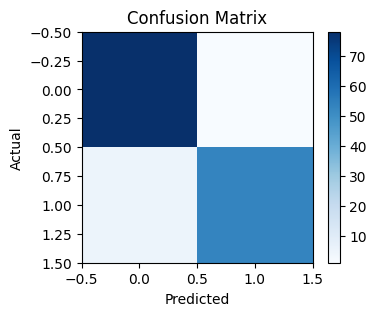

In [17]:
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix:\n", cm)

plt.figure(figsize=(4,3))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

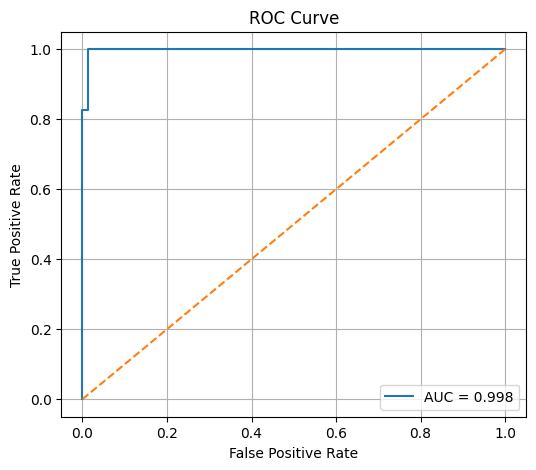


🔹 AUC Score: 0.998


In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"\n🔹 AUC Score: {roc_auc:.3f}")